In [343]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
url = "https://www2.census.gov/programs-surveys/popest/datasets/2010-2019/counties/totals/co-est2019-alldata.csv"
file=pd.read_csv(url, engine='python')
url2 = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/live/us-counties.csv'
file2= pd.read_csv(url2)

In [263]:
file.columns.get_loc('POPESTIMATE2019')


18

In [271]:
file2.head()


date   county    state    fips  cases  deaths  confirmed_cases  confirmed_deaths  probable_cases  probable_deaths
0  2020-10-25  Autauga  Alabama  1001.0   2048    31.0           1820.0              29.0           228.0              2.0
1  2020-10-25  Baldwin  Alabama  1003.0   6637    69.0           5627.0              65.0          1010.0              4.0
2  2020-10-25  Barbour  Alabama  1005.0   1031     9.0            729.0               9.0           302.0              0.0
3  2020-10-25     Bibb  Alabama  1007.0    828    14.0            759.0              10.0            69.0              4.0
4  2020-10-25   Blount  Alabama  1009.0   1925    25.0           1489.0              25.0           436.0              0.0

In [275]:
file2.isna().sum()

date                   0
county                 0
state                  0
fips                  30
cases                  0
deaths                79
confirmed_cases      751
confirmed_deaths    1219
probable_cases      1769
probable_deaths     2404
dtype: int64

In [274]:
file2['fips'].isna().sum()
file2['deaths'].isna().sum()
file2['confirmed'].isna().sum()
file2['confirmed_deaths'].isna().sum()
file2['probable_cases'].isna().sum()
file2['probable_deaths'].isna().sum()


30

In [130]:
pop=file.loc[:,['STNAME','CTYNAME', 'POPESTIMATE2019']]

In [170]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [262]:
pop.head()


STNAME  CTYNAME  POPESTIMATE2019
0  Alabama                   4903185
1  Alabama  Autauga            55869
2  Alabama  Baldwin           223234
3  Alabama  Barbour            24686
4  Alabama     Bibb            22394

In [276]:
confirmed=file2.fillna(value=0)
confirmed=confirmed.rename(columns= {'county' : 'CTYNAME', 'state' : 'STNAME'})
confirmed=confirmed.loc[:,['STNAME', 'CTYNAME', 'confirmed_cases']]



In [277]:
mask1 = file2[file2['confirmed_cases']<2000]
x1=file2[file2['confirmed_cases']<2000]
x2=file2['confirmed_cases']


In [237]:
pop=file.loc[:,['STNAME','CTYNAME', 'POPESTIMATE2019']]
pop['CTYNAME']=pop['CTYNAME'].astype('string').dropna()
pop.dtypes

STNAME             object
CTYNAME            string
POPESTIMATE2019     int64
dtype: object

In [252]:
pop=file.loc[:,['STNAME','CTYNAME', 'POPESTIMATE2019']]
pop['CTYNAME']=pop['CTYNAME'].astype('string').dropna()
pop.dtypes

STNAME             object
CTYNAME            string
POPESTIMATE2019     int64
dtype: object

In [256]:
def clean(x):
    return x.split(' ')[:-1]
def clean2(x):
    str1 = ' '
    return (str1.join(x))
pop['CTYNAME']=pop['CTYNAME'].apply(clean)
pop['CTYNAME']=pop['CTYNAME'].apply(clean2)


In [258]:
pop


STNAME                       CTYNAME  POPESTIMATE2019
0                  Alabama                                        4903185
1                  Alabama                       Autauga            55869
2                  Alabama                       Baldwin           223234
3                  Alabama                       Barbour            24686
4                  Alabama                          Bibb            22394
5                  Alabama                        Blount            57826
6                  Alabama                       Bullock            10101
7                  Alabama                        Butler            19448
8                  Alabama                       Calhoun           113605
9                  Alabama                      Chambers            33254
10                 Alabama                      Cherokee            26196
11                 Alabama                       Chilton            44428
12                 Alabama                       Choctaw            12589
13                 Alabama                        Clarke            23622
14                 Alabama                          Clay            13235
15                 Alabama                      Cleburne            14910
16                 Alabama                        Coffee            52342
17                 Alabama                       Colbert            55241
18                 Alabama                       Conecuh            12067
19                 Alabama                         Coosa            10663
20                 Alabama                     Covington            37049
21                 Alabama                      Crenshaw            13772
22                 Alabama                       Cullman            83768
23                 Alabama                          Dale            49172
24                 Alabama                        Dallas            37196
25                 Alabama                        DeKalb            71513
26                 Alabama                        Elmore            81209
27                 Alabama                      Escambia            36633
28                 Alabama                        Etowah           102268
29                 Alabama                       Fayette            16302
30                 Alabama                      Franklin            31362
31                 Alabama                        Geneva            26271
32                 Alabama                        Greene             8111
33                 Alabama                          Hale            14651
34                 Alabama                         Henry            17205
35                 Alabama                       Houston           105882
36                 Alabama                       Jackson            51626
37                 Alabama                     Jefferson           658573
38                 Alabama                         Lamar            13805
39                 Alabama                    Lauderdale            92729
40                 Alabama                      Lawrence            32924
41                 Alabama                           Lee           164542
42                 Alabama                     Limestone            98915
43                 Alabama                       Lowndes             9726
44                 Alabama                         Macon            18068
45                 Alabama                       Madison           372909
46                 Alabama                       Marengo            18863
47                 Alabama                        Marion            29709
48                 Alabama                      Marshall            96774
49                 Alabama                        Mobile           413210
50                 Alabama                        Monroe            20733
51                 Alabama                    Montgomery           226486
52                 Alabama                        Morgan           119679
53                 Alaba

In [189]:
pd.set_option('display.max_rows', 10000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pop

STNAME CTYNAME  POPESTIMATE2019
0                  Alabama     NaN          4903185
1                  Alabama     NaN            55869
2                  Alabama     NaN           223234
3                  Alabama     NaN            24686
4                  Alabama     NaN            22394
5                  Alabama     NaN            57826
6                  Alabama     NaN            10101
7                  Alabama     NaN            19448
8                  Alabama     NaN           113605
9                  Alabama     NaN            33254
10                 Alabama     NaN            26196
11                 Alabama     NaN            44428
12                 Alabama     NaN            12589
13                 Alabama     NaN            23622
14                 Alabama     NaN            13235
15                 Alabama     NaN            14910
16                 Alabama     NaN            52342
17                 Alabama     NaN            55241
18                 Alabama     NaN            12067
19                 Alabama     NaN            10663
20                 Alabama     NaN            37049
21                 Alabama     NaN            13772
22                 Alabama     NaN            83768
23                 Alabama     NaN            49172
24                 Alabama     NaN            37196
25                 Alabama     NaN            71513
26                 Alabama     NaN            81209
27                 Alabama     NaN            36633
28                 Alabama     NaN           102268
29                 Alabama     NaN            16302
30                 Alabama     NaN            31362
31                 Alabama     NaN            26271
32                 Alabama     NaN             8111
33                 Alabama     NaN            14651
34                 Alabama     NaN            17205
35                 Alabama     NaN           105882
36                 Alabama     NaN            51626
37                 Alabama     NaN           658573
38                 Alabama     NaN            13805
39                 Alabama     NaN            92729
40                 Alabama     NaN            32924
41                 Alabama     NaN           164542
42                 Alabama     NaN            98915
43                 Alabama     NaN             9726
44                 Alabama     NaN            18068
45                 Alabama     NaN           372909
46                 Alabama     NaN            18863
47                 Alabama     NaN            29709
48                 Alabama     NaN            96774
49                 Alabama     NaN           413210
50                 Alabama     NaN            20733
51                 Alabama     NaN           226486
52                 Alabama     NaN           119679
53                 Alabama     NaN             8923
54                 Alabama     NaN            19930
55                 Alabama     NaN            33114
56                 Alabama     NaN            22722
57                 Alabama     NaN            57961
58                 Alabama     NaN            89512
59                 Alabama     NaN           217702
60                 Alabama     NaN            12427
61                 Alabama     NaN            79978
62                 Alabama     NaN            40367
63                 Alabama     NaN           209355
64                 Alabama     NaN            63521
65                 Alabama     NaN            16326
66                 Alabama     NaN            10373
67                 Alabama     NaN            23629
68                  Alaska     NaN           731545
69                  Alaska     NaN             3337
70                  Alaska     NaN             5634
71                  Alaska     NaN           288000
72                  Alaska     NaN            18386
73                  Alaska     NaN              836
74                  Alaska     NaN             2097
75                  Alaska     NaN             4916
76              

In [181]:
confirmed

STNAME                            CTYNAME  confirmed_cases
0                      Alabama                            Autauga           1809.0
1                      Alabama                            Baldwin           5605.0
2                      Alabama                            Barbour            719.0
3                      Alabama                               Bibb            760.0
4                      Alabama                             Blount           1475.0
5                      Alabama                            Bullock            608.0
6                      Alabama                             Butler            957.0
7                      Alabama                            Calhoun           3767.0
8                      Alabama                           Chambers            946.0
9                      Alabama                           Cherokee            538.0
10                     Alabama                            Chilton           1666.0
11                     Alabama                            Choctaw            369.0
12                     Alabama                             Clarke           1104.0
13                     Alabama                               Clay            642.0
14                     Alabama                           Cleburne            509.0
15                     Alabama                             Coffee           1366.0
16                     Alabama                            Colbert           1876.0
17                     Alabama                            Conecuh            477.0
18                     Alabama                              Coosa            140.0
19                     Alabama                          Covington            958.0
20                     Alabama                           Crenshaw            476.0
21                     Alabama                            Cullman           1974.0
22                     Alabama                               Dale           1291.0
23                     Alabama                             Dallas           1565.0
24                     Alabama                             DeKalb           3130.0
25                     Alabama                             Elmore           2781.0
26                     Alabama                           Escambia           1406.0
27                     Alabama                             Etowah           3737.0
28                     Alabama                            Fayette            497.0
29                     Alabama                           Franklin           1970.0
30                     Alabama                             Geneva            637.0
31                     Alabama                             Greene            318.0
32                     Alabama                               Hale            672.0
33                     Alabama                              Henry            449.0
34                     Alabama                            Houston           2392.0
35                     Alabama                            Jackson           2007.0
36                     Alabama                          Jefferson          21885.0
37                     Alabama                              Lamar            427.0
38                     Alabama                         Lauderdale           1949.0
39                     Alabama                           Lawrence            793.0
40                     Alabama                                Lee           4236.0
41                     Alabama                          Limestone           2711.0
42                     Alabama                            Lowndes            673.0
43                     Alabama                              Macon            468.0
44                     Alabama                            Madison           8751.0
45                     Alabama                            Marengo            946.0
46                     Alabama                             Marion            946.0
47                     Alabama          

In [282]:
data.columns


Index(['STNAME', 'CTYNAME', 'POPESTIMATE2019', 'confirmed_cases'], dtype='object')

In [335]:
data=pd.merge(pop, confirmed, how="outer", on = ['STNAME','CTYNAME'])


In [325]:
data

STNAME                            CTYNAME  POPESTIMATE2019  confirmed_cases
0                      Alabama                                           4903185.0              NaN
1                      Alabama                            Autauga          55869.0           1820.0
2                      Alabama                            Baldwin         223234.0           5627.0
3                      Alabama                            Barbour          24686.0            729.0
4                      Alabama                               Bibb          22394.0            759.0
5                      Alabama                             Blount          57826.0           1489.0
6                      Alabama                            Bullock          10101.0            610.0
7                      Alabama                             Butler          19448.0            960.0
8                      Alabama                            Calhoun         113605.0           3838.0
9                      Alabama                           Chambers          33254.0            949.0
10                     Alabama                           Cherokee          26196.0            540.0
11                     Alabama                            Chilton          44428.0           1672.0
12                     Alabama                            Choctaw          12589.0            369.0
13                     Alabama                             Clarke          23622.0           1108.0
14                     Alabama                               Clay          13235.0            646.0
15                     Alabama                           Cleburne          14910.0            514.0
16                     Alabama                             Coffee          52342.0           1377.0
17                     Alabama                            Colbert          55241.0           1890.0
18                     Alabama                            Conecuh          12067.0            478.0
19                     Alabama                              Coosa          10663.0            140.0
20                     Alabama                          Covington          37049.0            969.0
21                     Alabama                           Crenshaw          13772.0            477.0
22                     Alabama                            Cullman          83768.0           2004.0
23                     Alabama                               Dale          49172.0           1307.0
24                     Alabama                             Dallas          37196.0           1567.0
25                     Alabama                             DeKalb          71513.0           3156.0
26                     Alabama                             Elmore          81209.0           2792.0
27                     Alabama                           Escambia          36633.0           1409.0
28                     Alabama                             Etowah         102268.0           3778.0
29                     Alabama                            Fayette          16302.0            502.0
30                     Alabama                           Franklin          31362.0           1985.0
31                     Alabama                             Geneva          26271.0            640.0
32                     Alabama                             Greene           8111.0            318.0
33                     Alabama                               Hale          14651.0            681.0
34                     Alabama                              Henry          17205.0            450.0
35                     Alabama                            Houston         105882.0           2409.0
36                     Alabama                            Jackson          51626.0           2025.0
37                     Alabama                          Jefferson         658573.0          22016.0
38                     Alabama                              Lamar          13805.0            437.0
39                     A

In [336]:
data = data.dropna()
data['confirmed_per'] = 0
data[['confirmed_per']]=data['confirmed_cases']/data['POPESTIMATE2019']

In [337]:
data


STNAME               CTYNAME  POPESTIMATE2019  confirmed_cases  confirmed_per
1            Alabama               Autauga          55869.0           1820.0       0.032576
2            Alabama               Baldwin         223234.0           5627.0       0.025207
3            Alabama               Barbour          24686.0            729.0       0.029531
4            Alabama                  Bibb          22394.0            759.0       0.033893
5            Alabama                Blount          57826.0           1489.0       0.025750
6            Alabama               Bullock          10101.0            610.0       0.060390
7            Alabama                Butler          19448.0            960.0       0.049362
8            Alabama               Calhoun         113605.0           3838.0       0.033784
9            Alabama              Chambers          33254.0            949.0       0.028538
10           Alabama              Cherokee          26196.0            540.0       0.020614
11           Alabama               Chilton          44428.0           1672.0       0.037634
12           Alabama               Choctaw          12589.0            369.0       0.029311
13           Alabama                Clarke          23622.0           1108.0       0.046905
14           Alabama                  Clay          13235.0            646.0       0.048810
15           Alabama              Cleburne          14910.0            514.0       0.034474
16           Alabama                Coffee          52342.0           1377.0       0.026308
17           Alabama               Colbert          55241.0           1890.0       0.034214
18           Alabama               Conecuh          12067.0            478.0       0.039612
19           Alabama                 Coosa          10663.0            140.0       0.013130
20           Alabama             Covington          37049.0            969.0       0.026155
21           Alabama              Crenshaw          13772.0            477.0       0.034635
22           Alabama               Cullman          83768.0           2004.0       0.023923
23           Alabama                  Dale          49172.0           1307.0       0.026580
24           Alabama                Dallas          37196.0           1567.0       0.042128
25           Alabama                DeKalb          71513.0           3156.0       0.044132
26           Alabama                Elmore          81209.0           2792.0       0.034380
27           Alabama              Escambia          36633.0           1409.0       0.038463
28           Alabama                Etowah         102268.0           3778.0       0.036942
29           Alabama               Fayette          16302.0            502.0       0.030794
30           Alabama              Franklin          31362.0           1985.0       0.063293
31           Alabama                Geneva          26271.0            640.0       0.024361
32           Alabama                Greene           8111.0            318.0       0.039206
33           Alabama                  Hale          14651.0            681.0       0.046481
34           Alabama                 Henry          17205.0            450.0       0.026155
35           Alabama               Houston         105882.0           2409.0       0.022752
36           Alabama               Jackson          51626.0           2025.0       0.039224
37           Alabama             Jefferson         658573.0          22016.0       0.033430
38           Alabama                 Lamar          13805.0            437.0       0.031655
39           Alabama            Lauderdale          92729.0           1962.0       0.021158
40           Alabama              Lawrence          32924.0            804.0       0.024420
41           Alabama                   Lee         164542.0           4247.0       0.025811
42           Alabama             Limestone          98915.0           2755.0       0.027852
43           Alabama               Lowndes           9726.

In [338]:
data.columns

Index(['STNAME', 'CTYNAME', 'POPESTIMATE2019', 'confirmed_cases', 'confirmed_per'], dtype='object')

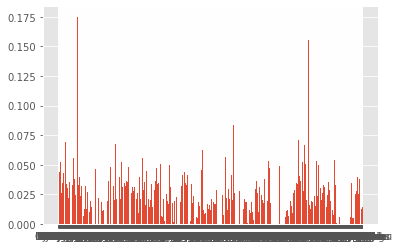

In [346]:
plt.style.use('ggplot')
x = data['CTYNAME']
y = data['confirmed_per']
plt.bar(x,y)
plt.show()